In [1]:
%load_ext autoreload
%autoreload 2

In [23]:
import numpy as np
from matplotlib import pyplot as plt
import multiclass_helper as MH
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Generamos Dataset

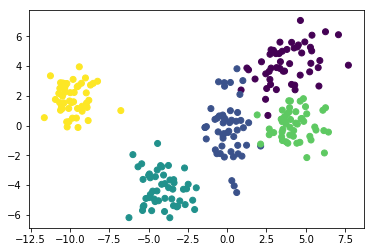

In [70]:
N = 50
mu_1 = [4, 4]
sigma_1 = [[  2,0.8],
           [0.8,  2]]

mu_2 = [0, 0]
sigma_2 = [[  0.5,  0],
           [  0,  4]]

mu_3 = [-4, -4]
sigma_3 = [[  1,  0],
           [  0,  1]]

mu_4 = [4, 0]
sigma_4 = [[  1,  0],
           [  0,  1]]

mu_5 = [-10, 2]
sigma_5 = [[  1,  0],
           [  0,  1]]


rvs = [
        [mu_1, sigma_1, N], 
        [mu_2, sigma_2, N],
        [mu_3, sigma_3, N],
        [mu_4, sigma_4, N],
        [mu_5, sigma_5, N]
      ]

X, y = MH.generate_dataset(rvs)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# Dividimos en train y test set

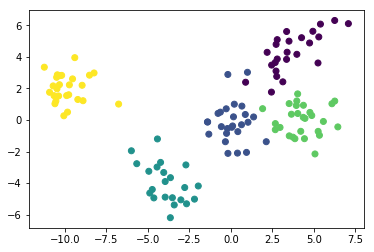

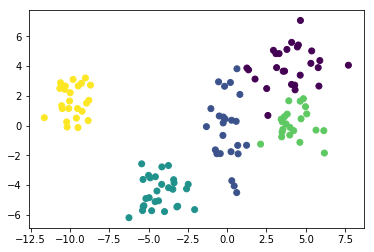

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.show()
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.show()

In [72]:
from keras.models import Sequential
from keras import optimizers
from keras.layers.core import Dense, Activation
from helper import PlotLosses
from keras.callbacks import ModelCheckpoint
from keras.initializers import RandomNormal
from keras import regularizers

# Modelo con Softmax

In [75]:
input_features = 2
hidden_units = 20
output_size = y_train_cat.shape[1]
model_sm = Sequential()
model_sm.add(Dense(hidden_units,input_dim=input_features, kernel_regularizer=regularizers.l2(lambd), name="Capa_Oculta"))
model_sm.add(Activation('sigmoid', name="sigmoid"))
model_sm.add(Dense(output_size, name="Salida"))
model_sm.add(Activation('softmax', name="softmax")) # Notar que en vez de sigmoidea es softmax
model_sm.summary()

lambd = 0.001
lr = 0.04 
batch_size = 20
epochs = 500

#selectedOptimizer = optimizers.SGD(lr=lr)
selectedOptimizer = optimizers.adam(lr=lr)

# Lo compilo, notar que en vez de binary_crossentropy va categorical_crossentropy
model_sm.compile(loss = 'categorical_crossentropy', optimizer=selectedOptimizer, metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Capa_Oculta (Dense)          (None, 20)                60        
_________________________________________________________________
sigmoid (Activation)         (None, 20)                0         
_________________________________________________________________
Salida (Dense)               (None, 5)                 105       
_________________________________________________________________
softmax (Activation)         (None, 5)                 0         
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________


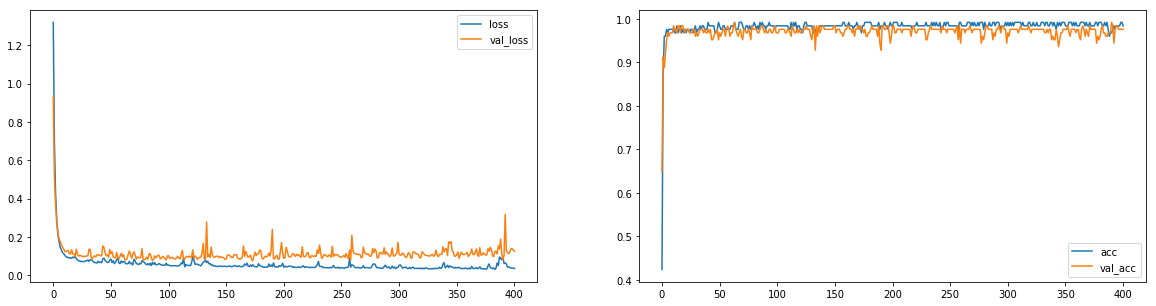

In [76]:
plot_losses = PlotLosses(plot_interval=100, 
                         evaluate_interval=None, 
                         x_val=X_test, 
                         y_val_categorical=y_test_cat)
model_sm.fit(X_train, 
          y_train_cat, 
          batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test_cat), 
          callbacks=[plot_losses],
         )

115648/116688 [============================>.] - ETA: 0s

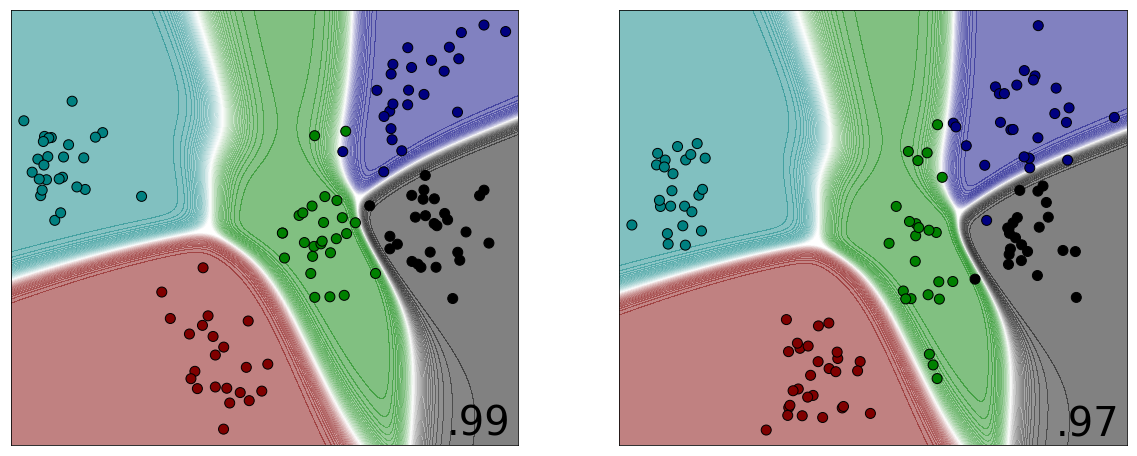

In [77]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
score_train = model_sm.evaluate(X_train, y_train_cat)
score_test = model_sm.evaluate(X_test, y_test_cat)
Z_aux, Z = MH.plot_MC_boundaries_keras(X_train, y_train, score_train[1], model_sm.predict_proba, h =.05, ax=ax1)
Z_aux, Z = MH.plot_MC_boundaries_keras(X_test, y_test, score_test[1], model_sm.predict_proba, h =.05, ax=ax2)
plt.show()

# Modelo con C sigmoideas donde C es la cantidad de Clases

In [78]:
model_sig = Sequential()
model_sig.add(Dense(hidden_units,input_dim=input_features, kernel_regularizer=regularizers.l2(lambd), name="Capa_Oculta"))
model_sig.add(Activation('sigmoid', name="sigmoid"))
model_sig.add(Dense(output_size, name="Salida"))
model_sig.add(Activation('sigmoid', name="output")) 
model_sig.summary()

lambd = 0 #0.001
lr = 0.04 
batch_size = 20
epochs = 2000

#selectedOptimizer = optimizers.SGD(lr=lr)
selectedOptimizer = optimizers.adam(lr=lr)

# Lo compilo, notar que en vez de binary_crossentropy va categorical_crossentropy
model_sig.compile(loss = 'binary_crossentropy', optimizer=selectedOptimizer, metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Capa_Oculta (Dense)          (None, 20)                60        
_________________________________________________________________
sigmoid (Activation)         (None, 20)                0         
_________________________________________________________________
Salida (Dense)               (None, 5)                 105       
_________________________________________________________________
output (Activation)          (None, 5)                 0         
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________


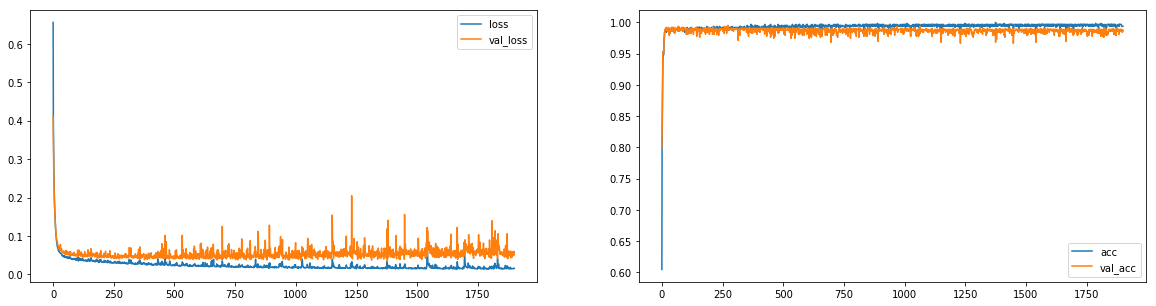

In [79]:
plot_losses = PlotLosses(plot_interval=100, 
                         evaluate_interval=None, 
                         x_val=X_test, 
                         y_val_categorical=y_test_cat)
model_sig.fit(X_train, 
          y_train_cat, 
          batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test_cat), 
          callbacks=[plot_losses],
         )

116064/116688 [============================>.] - ETA: 0s

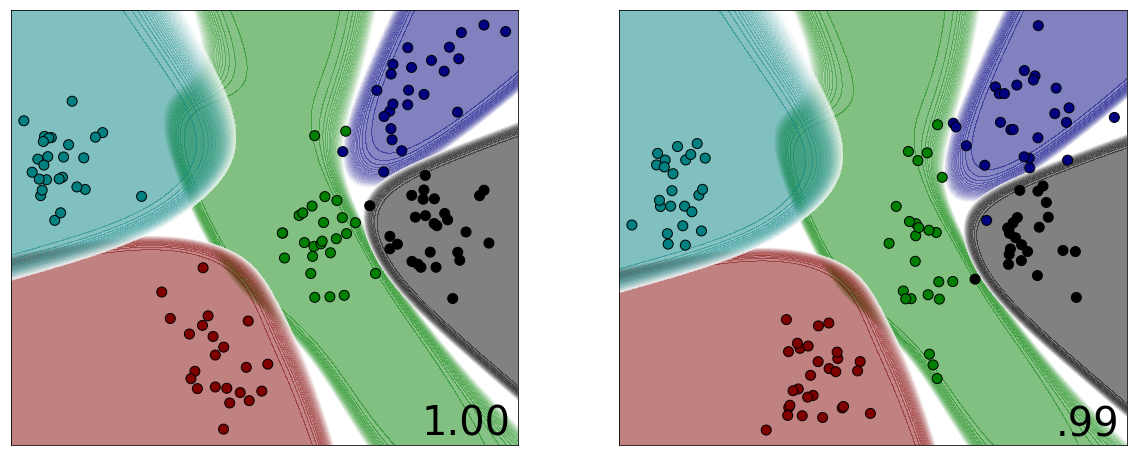

In [80]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
score_train = model_sig.evaluate(X_train, y_train_cat)
score_test = model_sig.evaluate(X_test, y_test_cat)
Z_aux, Z = MH.plot_MC_boundaries_keras(X_train, y_train, score_train[1], model_sig.predict_proba, h =.05, ax=ax1)
Z_aux, Z = MH.plot_MC_boundaries_keras(X_test, y_test, score_test[1], model_sig.predict_proba, h =.05, ax=ax2)
plt.show()